## ライブラリのインポート

In [18]:
import numpy as np
import matplotlib.pyplot as plt

自作ライブラリのインポート

In [19]:
from main import MiddleLayer, OutputLayer, sigmoid, sigmoid_dash, identity, error_dash

## データの作成

In [20]:
sin_data = np.arange(0, 2 * np.pi, 0.1).reshape((-1, 1))

X = (sin_data - np.pi) / np.pi
Y = np.sin(sin_data)

描画用関数

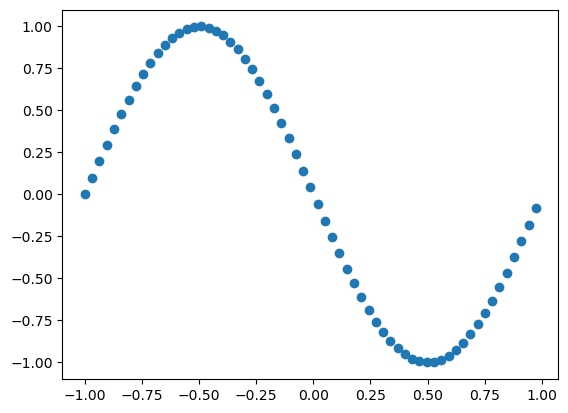

In [21]:
def plot(Y_dash=None):
    plt.scatter(X, Y)
    if Y_dash is not None:
        plt.scatter(X, Y_dash)
    plt.show()

plot()

## デモ

layer を作成

In [22]:
Layers = []

Layers.append(MiddleLayer(1, 3, activation_func=sigmoid, activation_func_dash=sigmoid_dash))
Layers.append(OutputLayer(3, 1, activation_func=identity, error_func_dash=error_dash))

重みとバイアスの確認

In [23]:
Layers[0].W, Layers[0].b

(array([[ 0.00993333, -0.00732063, -0.00141971]]),
 array([-8.48711863e-04, -9.76207488e-03,  7.01927060e-05]))

順伝播(=無学習の状態で予測)

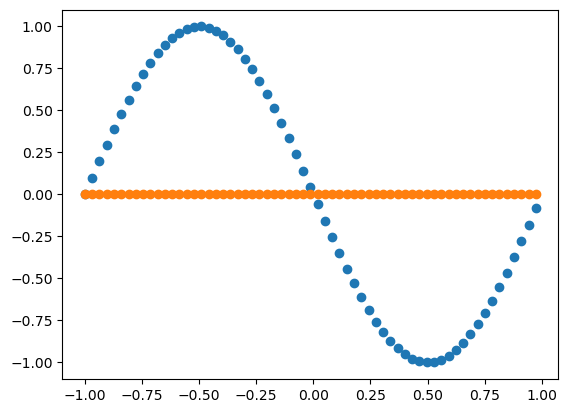

In [24]:
Y1 = Layers[0].forward(X)
Y_dash = Layers[1].forward(Y1)

plot(Y_dash)

逆伝播(=初めての学習)

In [25]:
dY1 = Layers[1].backward(Y)
_ = Layers[0].backward(dY1)

順伝播(2回目)

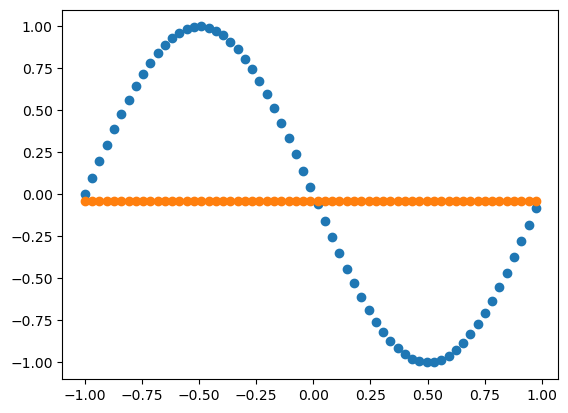

In [26]:
Y1 = Layers[0].forward(X)
Y_dash = Layers[1].forward(Y1)

plot(Y_dash)

重みとバイアスが更新されたことを確認

In [27]:
Layers[0].W, Layers[0].b

(array([[ 0.0164722 , -0.00572175, -0.00475664]]),
 array([-7.67632046e-04, -9.74231323e-03,  2.88297449e-05]))

## 学習

layer の作成

In [28]:
Layers = []

Layers.append(MiddleLayer(1, 3, activation_func=sigmoid, activation_func_dash=sigmoid_dash))
Layers.append(OutputLayer(3, 1, activation_func=identity, error_func_dash=error_dash))

設定

In [29]:
epoch = 2001
batch = 10
n_data = len(X)
interval = 200

エポックごとに学習

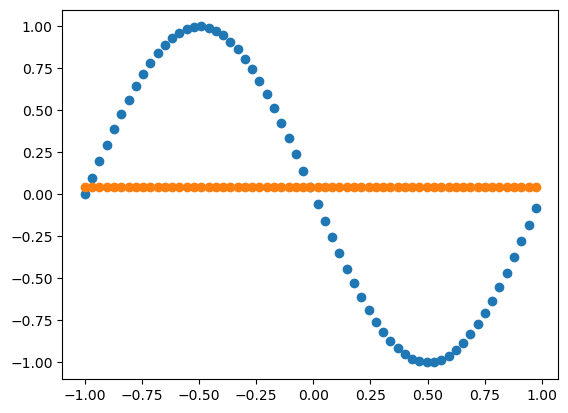

Epoch: 0/2001 Error: 0.2503563794021482


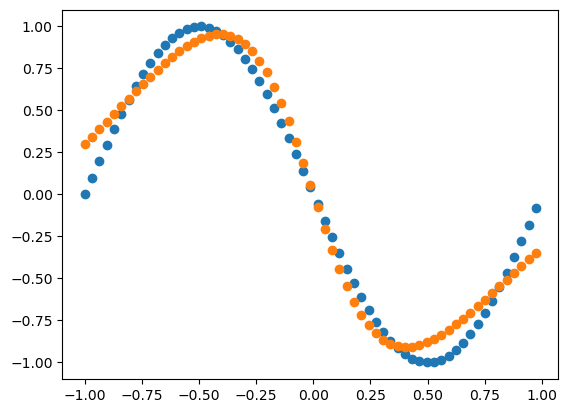

Epoch: 200/2001 Error: 0.006230873238480004


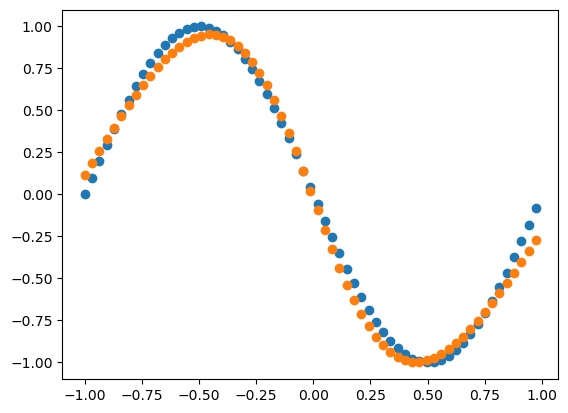

Epoch: 400/2001 Error: 0.0021551900789153777


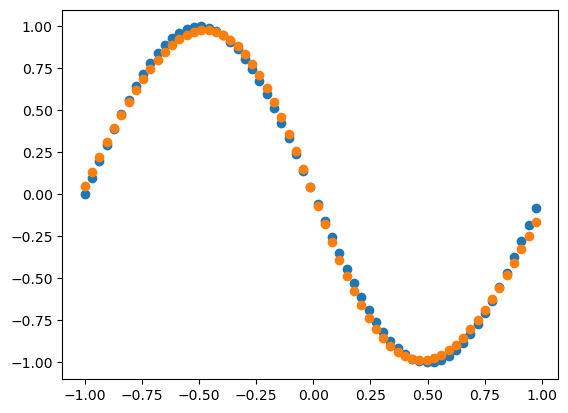

Epoch: 600/2001 Error: 0.0004908935707652195


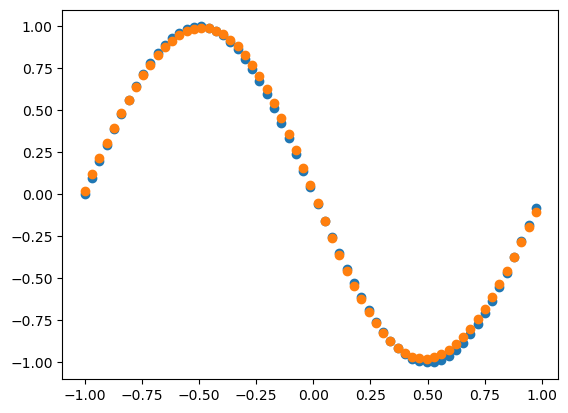

Epoch: 800/2001 Error: 0.00017094601315803247


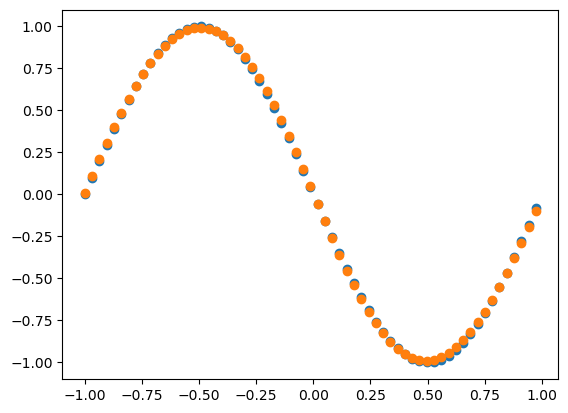

Epoch: 1000/2001 Error: 4.886535004570066e-05


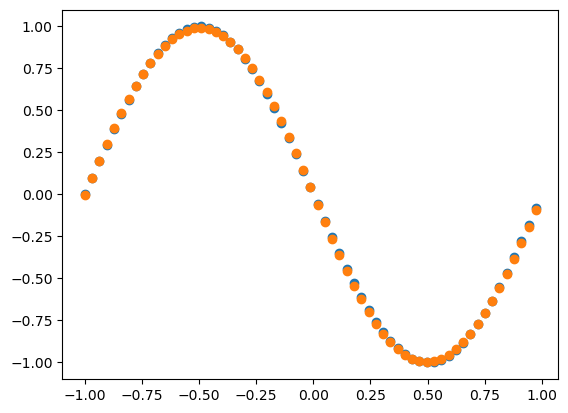

Epoch: 1200/2001 Error: 2.4114945576003886e-05


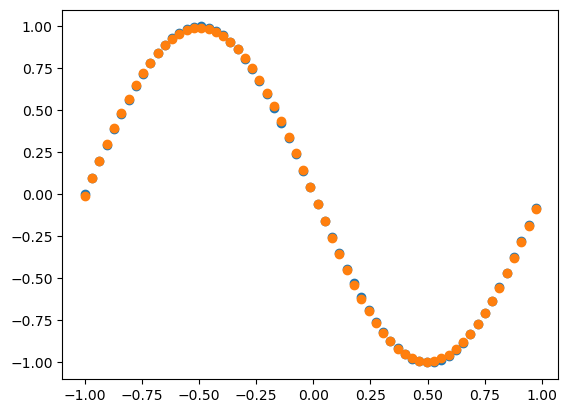

Epoch: 1400/2001 Error: 1.281163382689454e-05


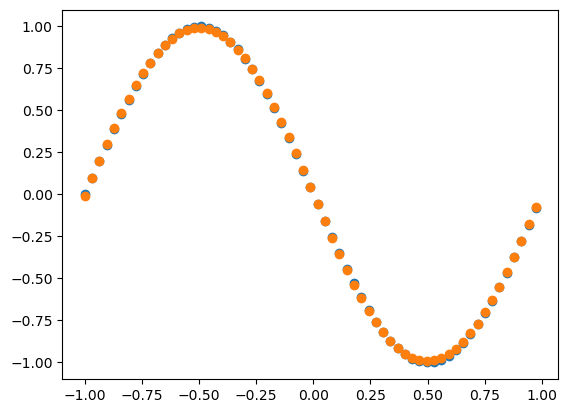

Epoch: 1600/2001 Error: 1.2573725646171364e-05


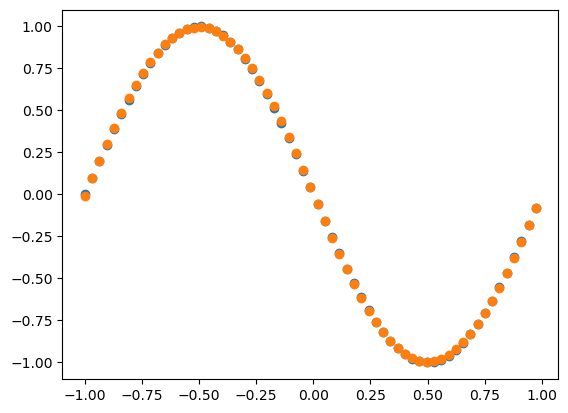

Epoch: 1800/2001 Error: 9.683230450435512e-06


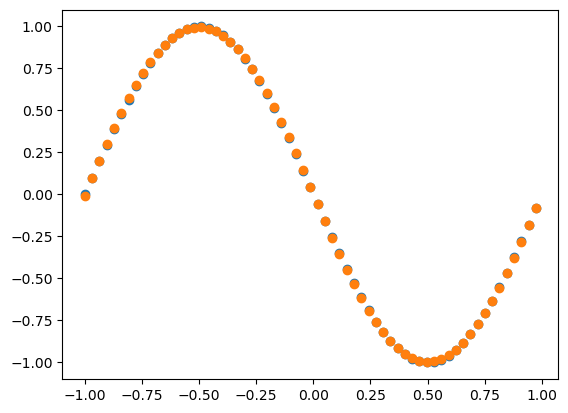

Epoch: 2000/2001 Error: 7.882597904584851e-06


In [30]:
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    for j in range(0, n_data, batch):
        idx = index_random[j: j + batch]

        tX, tY = X[idx], Y[idx]

        for layer in Layers:
            tX = layer.forward(tX)

        for layer in Layers[::-1]:
            tY = layer.backward(tY)
    
    if i % interval == 0:
        Y_dash = X[::]

        for layer in Layers:
            Y_dash = layer.forward(Y_dash)

        total_error = np.sum(np.square(Y_dash - Y)) / 2

        plot(Y_dash)
        print(f"Epoch: {i}/{epoch}", f"Error: {total_error / n_data}")

## 本

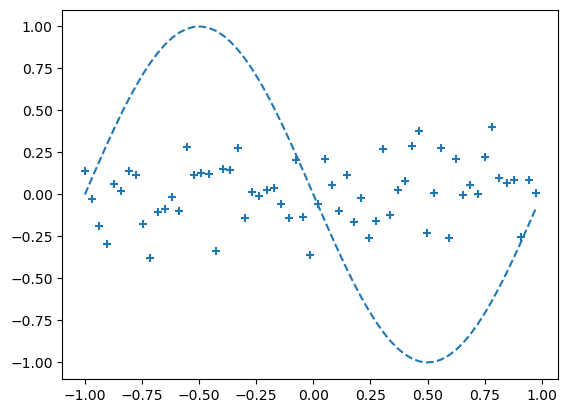

Epoch:0/2001 Error:0.28147277448594443


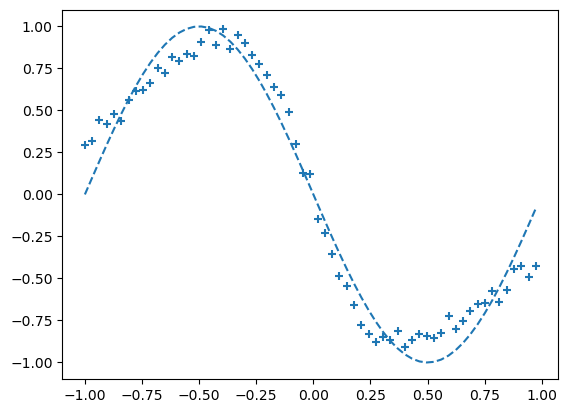

Epoch:200/2001 Error:0.009177890773105516


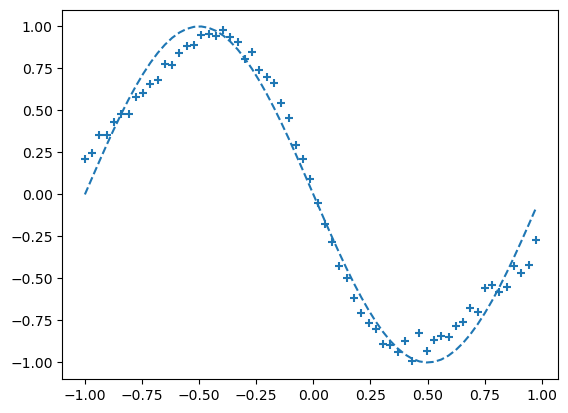

Epoch:400/2001 Error:0.005490372028592439


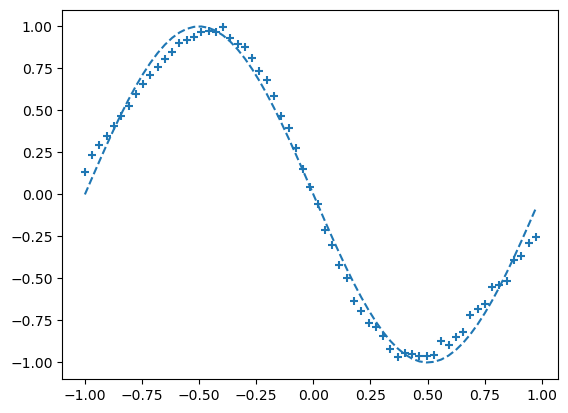

Epoch:600/2001 Error:0.002292415654700331


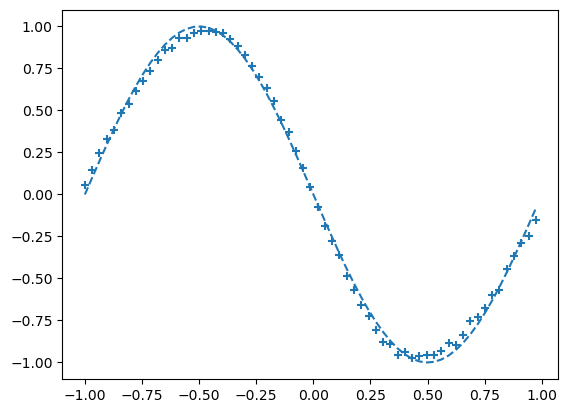

Epoch:800/2001 Error:0.0006896141504133299


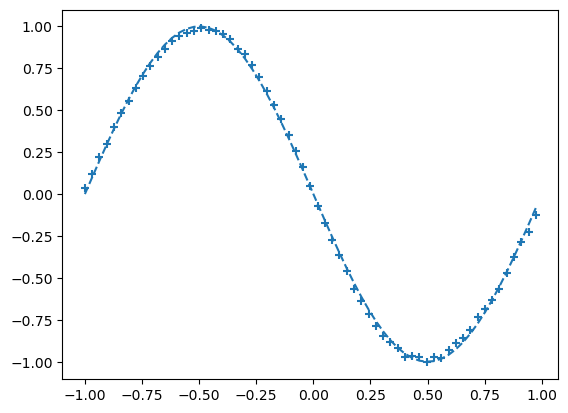

Epoch:1000/2001 Error:0.00021250250462528805


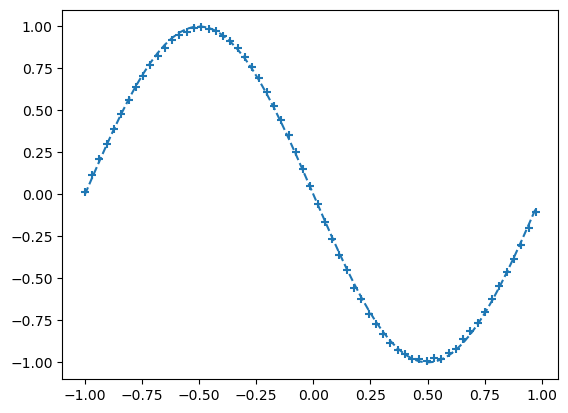

Epoch:1200/2001 Error:7.80904986290966e-05


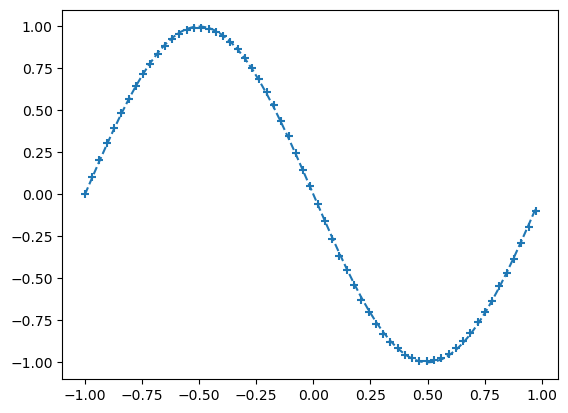

Epoch:1400/2001 Error:3.328914255162573e-05


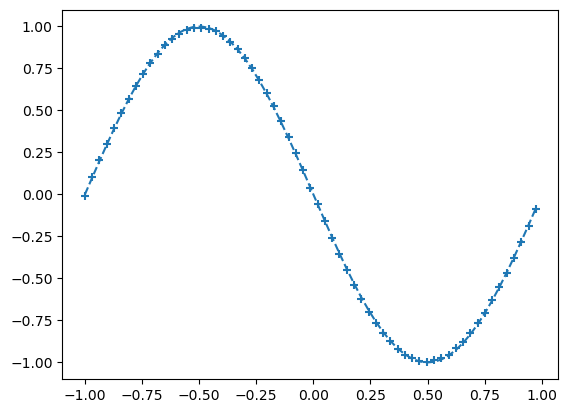

Epoch:1600/2001 Error:1.7412104038856596e-05


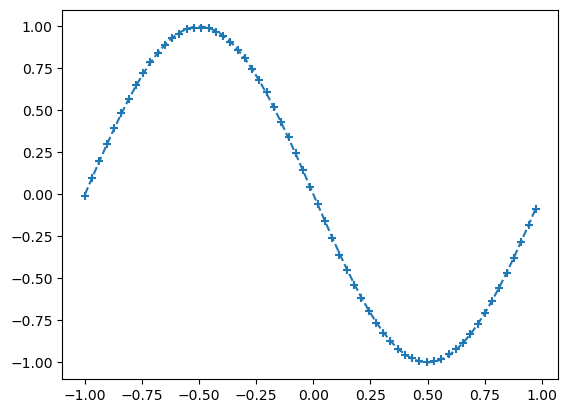

Epoch:1800/2001 Error:1.117602618193039e-05


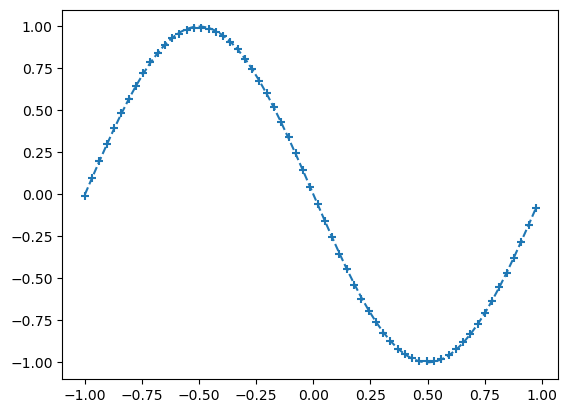

Epoch:2000/2001 Error:9.048829634413483e-06


In [31]:
input_data = np.arange(0, np.pi * 2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data - np.pi) / np.pi

n_data = len(correct_data)

epoch = 2001
interval = 200

Layers = []

Layers.append(MiddleLayer(1, 3, activation_func=sigmoid, activation_func_dash=sigmoid_dash))
Layers.append(OutputLayer(3, 1, activation_func=identity, error_func_dash=error_dash))

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    total_error = 0
    plot_x = []
    plot_y = []

    for idx in index_random:

        x = input_data[idx: idx + 1]
        t = correct_data[idx: idx + 1]

        X = x.reshape(1, 1)

        for layer in Layers:
            X = layer.forward(X)
        
        T = t.reshape(1, 1)

        for layer in Layers[::-1]:
            T = layer.backward(T)

        if i % interval == 0:
            y = Layers[-1].Y.reshape(-1)
            total_error += 1.0 / 2.0 * np.sum(np.square(y - t))

            plot_x.append(x)
            plot_y.append(y)
    if i % interval == 0:
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))